In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Define a function to load and concatenate all CSV files
def load_and_concatenate_csvs(directory_path):
    data_frames = []
    try:
        for file_name in os.listdir(directory_path):
            if file_name.endswith('.csv'):
                file_path = os.path.join(directory_path, file_name)
                df = pd.read_csv(file_path)
                data_frames.append(df)
        concatenated_df = pd.concat(data_frames, ignore_index=True)
        return concatenated_df
    except FileNotFoundError as e:
        print(f"Error: {e}")
        return pd.DataFrame()


directory_path = r'cycle_data'  

In [5]:
# Load all CSV files
battery_data = load_and_concatenate_csvs(directory_path)


if not battery_data.empty:
    
    print("Data loaded successfully!")
    print(battery_data.info())
    print(battery_data.head())

    
    # Drop columns with no data
    battery_data = battery_data.drop(columns=['Start_Time', 'End_Time'])

    # Check for missing values
    missing_values = battery_data.isnull().sum()
    print("Missing values per column after dropping empty columns:")
    print(missing_values)

    # Handle any remaining missing values
    battery_data.fillna(battery_data.mean(), inplace=True)

    
    print("First few rows after preprocessing:")
    print(battery_data.head())

    
else:
    print("No data loaded. Please check the directory path and try again.")


Data loaded successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12480 entries, 0 to 12479
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Cycle_Index              12480 non-null  float64
 1   Start_Time               0 non-null      float64
 2   End_Time                 0 non-null      float64
 3   Test_Time (s)            12480 non-null  float64
 4   Min_Current (A)          12480 non-null  float64
 5   Max_Current (A)          12480 non-null  float64
 6   Min_Voltage (V)          12480 non-null  float64
 7   Max_Voltage (V)          12480 non-null  float64
 8   Charge_Capacity (Ah)     12480 non-null  float64
 9   Discharge_Capacity (Ah)  12480 non-null  float64
 10  Charge_Energy (Wh)       12480 non-null  float64
 11  Discharge_Energy (Wh)    12480 non-null  float64
dtypes: float64(12)
memory usage: 1.1 MB
None
   Cycle_Index  Start_Time  End_Time  Test_Time (s)  Min_Curren

In [6]:
# Calculate capacity fade
initial_capacity = battery_data['Charge_Capacity (Ah)'].iloc[0]
battery_data['Capacity_Fade'] = initial_capacity - battery_data['Discharge_Capacity (Ah)']

# Calculate energy efficiency
battery_data['Energy_Efficiency'] = battery_data['Discharge_Energy (Wh)'] / battery_data['Charge_Energy (Wh)']

# Calculate average voltage during charge and discharge cycles
battery_data['Average_Charge_Voltage'] = battery_data['Charge_Energy (Wh)'] / battery_data['Charge_Capacity (Ah)']
battery_data['Average_Discharge_Voltage'] = battery_data['Discharge_Energy (Wh)'] / battery_data['Discharge_Capacity (Ah)']

# Display the first few rows with new features
battery_data.head()


,Cycle_Index,Test_Time (s),Min_Current (A),Max_Current (A),Min_Voltage (V),Max_Voltage (V),Charge_Capacity (Ah),Discharge_Capacity (Ah),Charge_Energy (Wh),Discharge_Energy (Wh),Capacity_Fade,Energy_Efficiency,Average_Charge_Voltage,Average_Discharge_Voltage
0,1.0,10907.674,-0.550,0.905,2.699,4.201,0.108,1.268,0.455,4.717,-1.160,10.367033,4.212963,3.720032
1,2.0,28594.592,-0.550,1.275,2.699,4.200,1.268,1.269,5.073,4.725,-1.161,0.931402,4.000789,3.723404
2,3.0,46275.123,-0.551,1.293,2.699,4.200,1.268,1.269,5.071,4.730,-1.161,0.932755,3.999211,3.727344
3,4.0,63919.436,-0.551,1.273,2.699,4.200,1.269,1.269,5.076,4.727,-1.161,0.931245,4.000000,3.724980
4,5.0,81579.524,-0.550,1.281,2.699,4.212,1.268,1.268,5.072,4.724,-1.160,0.931388,4.000000,3.725552


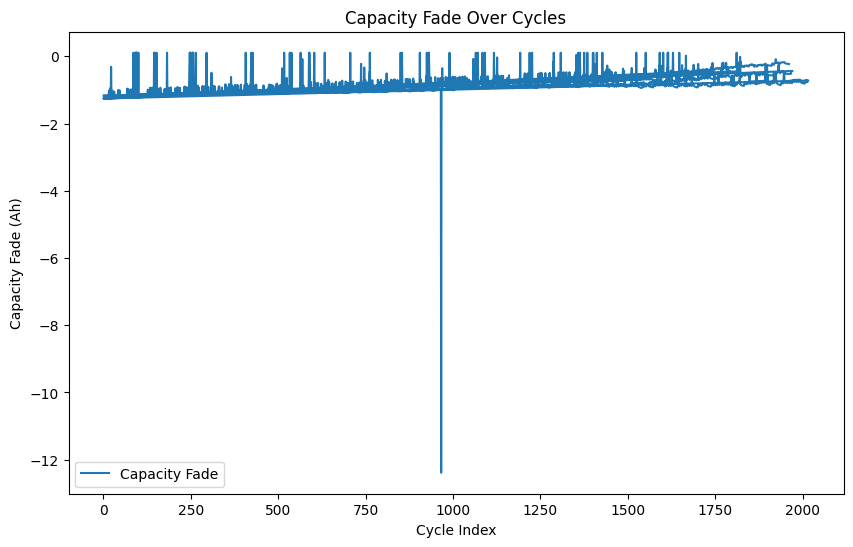

In [7]:
# Plot capacity fade over cycles
plt.figure(figsize=(10, 6))
plt.plot(battery_data['Cycle_Index'], battery_data['Capacity_Fade'], label='Capacity Fade')
plt.xlabel('Cycle Index')
plt.ylabel('Capacity Fade (Ah)')
plt.title('Capacity Fade Over Cycles')
plt.legend()
plt.show()


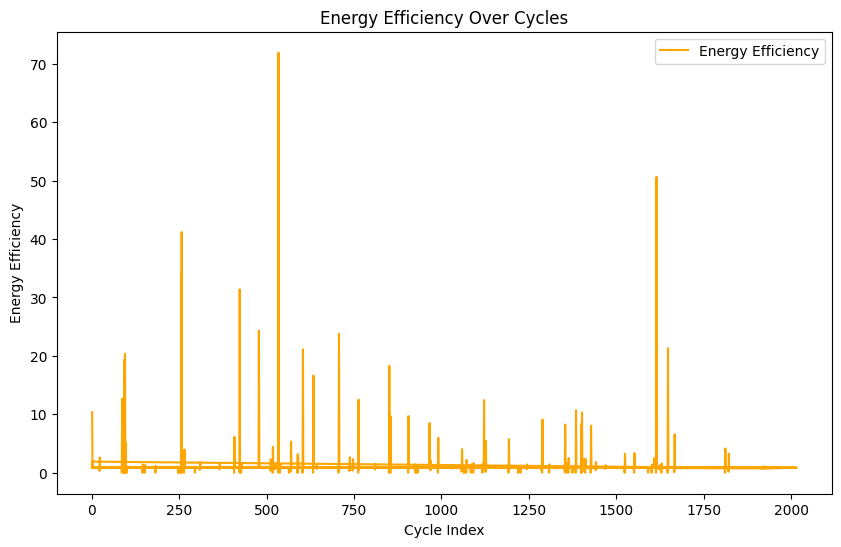

In [8]:
# Plot energy efficiency over cycles
plt.figure(figsize=(10, 6))
plt.plot(battery_data['Cycle_Index'], battery_data['Energy_Efficiency'], label='Energy Efficiency', color='orange')
plt.xlabel('Cycle Index')
plt.ylabel('Energy Efficiency')
plt.title('Energy Efficiency Over Cycles')
plt.legend()
plt.show()


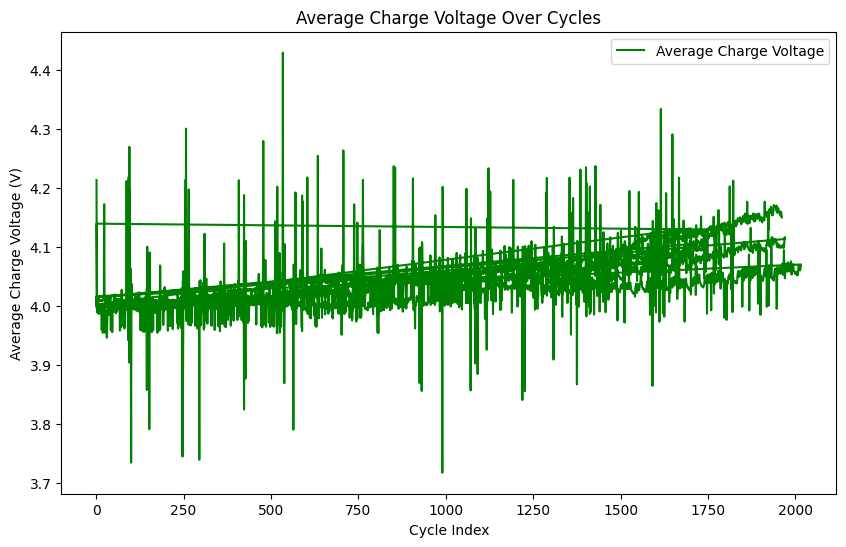

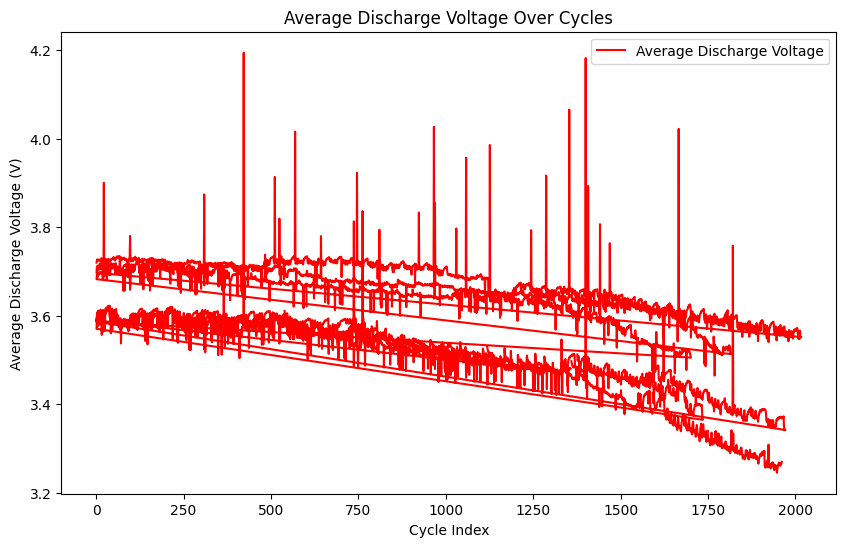

In [9]:
# Plot average charge voltage over cycles
plt.figure(figsize=(10, 6))
plt.plot(battery_data['Cycle_Index'], battery_data['Average_Charge_Voltage'], label='Average Charge Voltage', color='green')
plt.xlabel('Cycle Index')
plt.ylabel('Average Charge Voltage (V)')
plt.title('Average Charge Voltage Over Cycles')
plt.legend()
plt.show()

# Plot average discharge voltage over cycles
plt.figure(figsize=(10, 6))
plt.plot(battery_data['Cycle_Index'], battery_data['Average_Discharge_Voltage'], label='Average Discharge Voltage', color='red')
plt.xlabel('Cycle Index')
plt.ylabel('Average Discharge Voltage (V)')
plt.title('Average Discharge Voltage Over Cycles')
plt.legend()
plt.show()


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the data
# Assuming battery_data is already loaded and cleaned

# Feature Engineering
try:
    initial_capacity = battery_data['Charge_Capacity (Ah)'].iloc[0]
except IndexError:
    print("Error: 'Charge_Capacity (Ah)' column is empty or does not exist.")
    initial_capacity = None

if initial_capacity is not None:
    battery_data['Capacity_Fade'] = initial_capacity - battery_data['Discharge_Capacity (Ah)']
    battery_data['Energy_Efficiency'] = battery_data['Discharge_Energy (Wh)'] / battery_data['Charge_Energy (Wh)']
    battery_data['Average_Charge_Voltage'] = battery_data['Charge_Energy (Wh)'] / battery_data['Charge_Capacity (Ah)']
    battery_data['Average_Discharge_Voltage'] = battery_data['Discharge_Energy (Wh)'] / battery_data['Discharge_Capacity (Ah)']

    # Additional Features
    battery_data['Capacity_Fade_Rate'] = battery_data['Capacity_Fade'].diff().fillna(0)
    battery_data['Efficiency_Drop_Rate'] = battery_data['Energy_Efficiency'].diff().fillna(0)

    # Create target variable for RUL
    battery_data['RUL'] = battery_data['Cycle_Index'].max() - battery_data['Cycle_Index']

    # Features for the model
    features = ['Test_Time (s)', 'Min_Current (A)', 'Max_Current (A)', 'Min_Voltage (V)', 'Max_Voltage (V)',
                'Charge_Capacity (Ah)', 'Discharge_Capacity (Ah)', 'Charge_Energy (Wh)', 'Discharge_Energy (Wh)',
                'Capacity_Fade', 'Energy_Efficiency', 'Average_Charge_Voltage', 'Average_Discharge_Voltage',
                'Capacity_Fade_Rate', 'Efficiency_Drop_Rate']

    # Ensure there are no missing values in the features
    battery_data = battery_data.dropna(subset=features + [target])

    # Target variable
    target = 'RUL'

    # Splitting the data into training and testing sets
    X = battery_data[features]
    y = battery_data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Training a Linear Regression model
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    # Making predictions
    lr_predictions = lr.predict(X_test)

    # Evaluating the model
    lr_mse = mean_squared_error(y_test, lr_predictions)
    print(f'Linear Regression MSE: {lr_mse}')

    # Plotting predictions vs actual values
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.values, label='Actual RUL')
    plt.plot(lr_predictions, label='Predicted RUL (LR)', linestyle='--')
    plt.xlabel('Sample Index')
    plt.ylabel('RUL')
    plt.legend()
    plt.show()
else:
    print("No data loaded or initial capacity not found.")


NameError: name 'target' is not defined